<ipython-input-1-b7e5225634d6>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2015-01-01', periods=120, freq='M')  # 10 years monthly


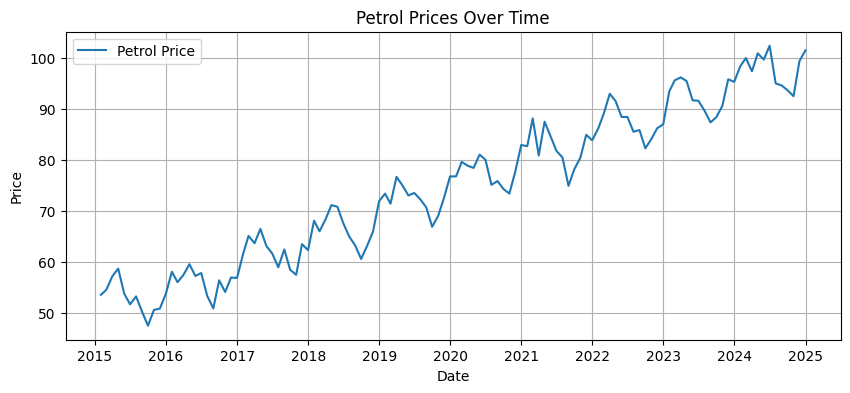

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-1-b7e5225634d6>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


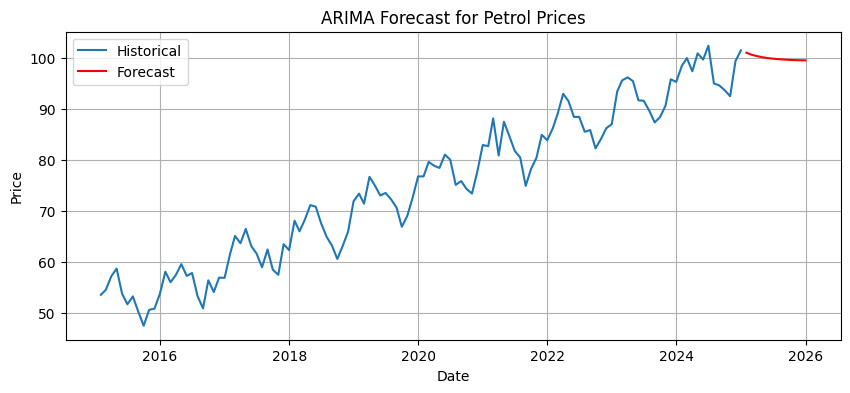

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Step 1: Generate synthetic petrol price data
np.random.seed(42)
dates = pd.date_range(start='2015-01-01', periods=120, freq='M')  # 10 years monthly
trend = np.linspace(50, 100, 120)
seasonal = 5 * np.sin(2 * np.pi * dates.month / 12)
noise = np.random.normal(0, 2, 120)
prices = trend + seasonal + noise

df = pd.DataFrame({'Date': dates, 'Petrol_Price': prices})
df.set_index('Date', inplace=True)

# Step 2: Plot original data
plt.figure(figsize=(10, 4))
plt.plot(df, label='Petrol Price')
plt.title("Petrol Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Fit ARIMA model (order can be tuned)
model = ARIMA(df['Petrol_Price'], order=(2, 1, 2))  # (p,d,q)
model_fit = model.fit()

# Step 4: Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 5: Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df['Petrol_Price'], label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title("ARIMA Forecast for Petrol Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
